<a href="https://colab.research.google.com/github/anumit2004/Supervised-Learning-Models/blob/linear-regression/build_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This is simple custom Stochastic Gradient Descent algorithm."

**STOCHASTIC GRADIENT DESCENT**

 IT TAKES ONLY ONE INSTANCE AT A TIME ,it will take less time , less number of iterations to achieve the same accuracy than gradient descent.

CALCULATION:

GD=gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m as it has only one instance in each ieration.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

making the code for sgd regressor

In [ ]:
class Sgdregressor:
  def __init__(self,epochs=1000,tol=1e-6):
    self.learning_rate=None
    self.epochs=epochs
    self.tol=tol
    self.weights=None
    self.bias=None
  #for getting larger learining rate at first and then smaller learning rate
  '''initially it will help to cross the local minimas , but then as the
    learing rate decreases it will move towards the global minima'''

  def learning_schedule(self,t):
    t0=5
    t1=50
    return t0/(t+t1)

  def mean_square_error(self,y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

  def gradient_descent(self,x,y):
    y_pred=self.predict(x)
    err=y_pred-y
    dw=x.T@err
    db=np.sum(err)
    return dw,db

  def fit(self,x,y):
     self.m,self.n=x.shape
     self.weights=np.zeros(self.n)
     self.bias=0
     self.x=x
     self.y=y
     #taking only one instance
     for i in range(self.epochs):
      random_indices=np.random.permutation(self.m)
      x_suffle=self.x[random_indices]
      y_suffle=self.y[random_indices]
      for j in range(self.m):
        random_index=np.random.randint(self.m)
        x_j=x_suffle[random_index:random_index+1]
        y_j=y_suffle[random_index:random_index+1]
        dw,db=self.gradient_descent(x_j,y_j)
        self.learing_rate=self.learning_schedule(self.epochs+j)
        self.weights=self.weights-self.learing_rate*dw
        self.bias=self.bias-self.learing_rate*db
        #calculating norm for the value of gradient decent
        w_norm=np.linalg.norm(self.weights)
        b_norm=self.bias
        norm=w_norm+b_norm
        if(norm<self.tol):
          print('convergence reached !!!')
          break;
      return self.weights,self.bias


  def predict(self,x):
    return np.dot(x,self.weights)+self.bias



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.shape

(30, 2)

In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
x=x.reshape(-1,1)

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


spliting dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22,)
(8,)


In [ ]:
model=Sgdregressor()
weight_final,bias_final=model.fit(x_train,y_train)
print('weight = ',weight_final)
print('bias =',bias_final)

weight =  [13431.44851762]
bias = 2437.343543212902


In [ ]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

[ 91738  54445  56642  37731  43525  98273  57081 112635]
[ 93771.19346306  45417.97879961  41388.54424432  22584.51631965
  29300.24057846  97800.62801835  57506.28246547 131379.24931241]


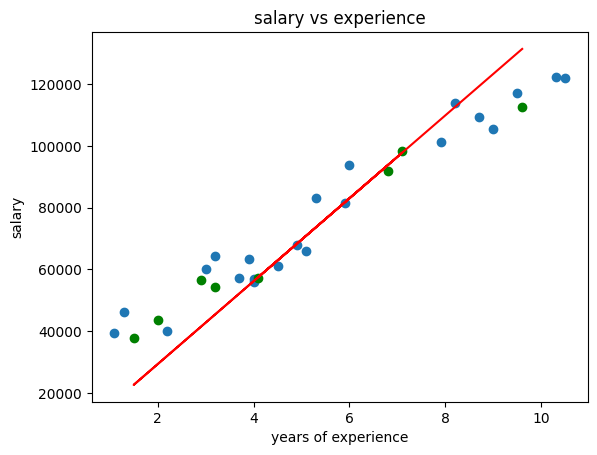

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,color='red')
plt.scatter(x_test,y_test,color='green')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()
